Test the data options

In [36]:
from perceptron import Perceptron
import os


def test_data_options(paths: list[str], outfile: str, tests_per_option: int):
    try:
        p = Perceptron(*paths)
    except Exception as e:
        print(e)
        return

    # normal
    for _ in range(tests_per_option):
        try:
            p.train(ensemble_size=100, log="min", outfile=outfile)
        except Exception as e:
            print(e)
            break

    # other data options
    for option in ["partial", "cycle", "window"]:
        for size in [0.25, 0.5, 0.75]:
            for _ in range(tests_per_option):
                try:
                    p.train(ensemble_size=100, log="min", data_opts=option, epoch_size=size, outfile=outfile)
                except Exception as e:
                    print(e)
                    break


def main():
    datapaths = []
    for dir in os.listdir("data"):
        if os.path.isdir(f"data/{dir}"):
            dirs = [f"data/{dir}/{file}" for file in os.listdir(f"data/{dir}")]
            datapaths.append(dirs)

    for paths in datapaths:
        test_data_options(paths, "results/data_options_tests.csv", 10)


main()

Analysis

  data_opts  epoch_size   max_acc  max_at
0     cycle        0.25  0.882010    11.4
1     cycle        0.50  0.843052     9.7
2     cycle        0.75  0.826290     1.0
3   partial        0.25  0.852112     1.0
4   partial        0.50  0.810373     1.0
5   partial        0.75  0.784316     1.0
6     whole        1.00  0.825575     1.0
7    window        0.25  0.890137    43.9
8    window        0.50  0.889796    33.7
9    window        0.75  0.890026    39.6
  data_opts  epoch_size  max_acc  max_at
0     cycle        0.25   0.7040    12.4
1     cycle        0.50   0.6860     2.6
2     cycle        0.75   0.6636     1.0
3   partial        0.25   0.5112     1.0
4   partial        0.50   0.6116     1.0
5   partial        0.75   0.5292     1.0
6     whole        1.00   0.6056     1.0
  data_opts  epoch_size   max_acc  max_at
0     cycle        0.25  0.857184    31.1
1     cycle        0.50  0.845212    38.9
2     cycle        0.75  0.821888     1.0
3   partial        0.25  0.795736     1.0


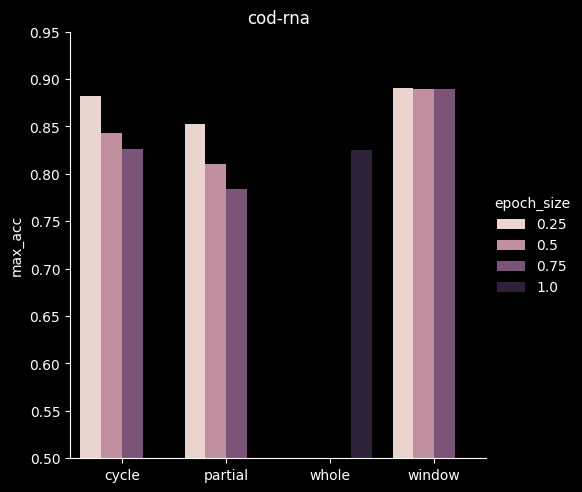

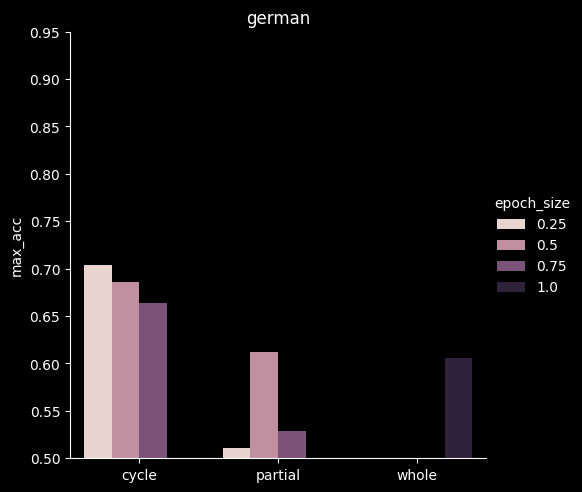

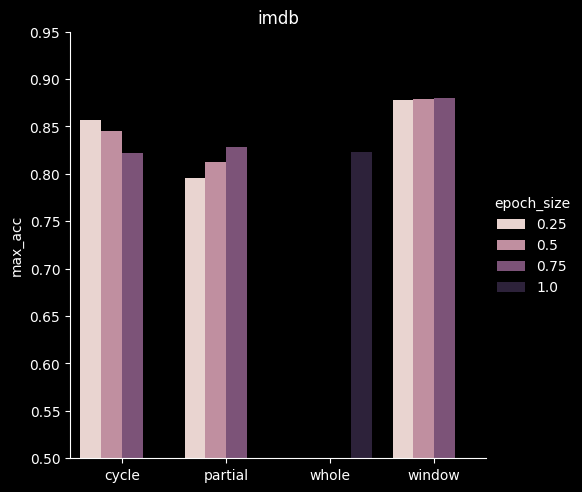

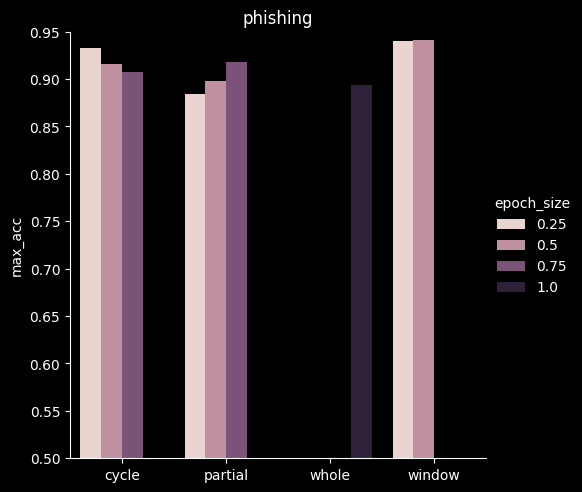

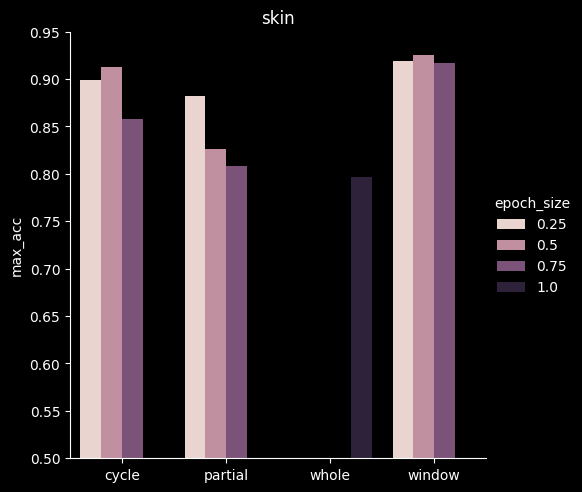

In [117]:
import pandas as pd
import seaborn as sns

# dataset,max_acc,last_acc,ensemble_size,epoch_size,data_opts,train_time,all_accs
df = pd.read_csv("../results/data_options_tests.csv")

df["all_accs"] = df["all_accs"].apply(eval)
df["max_at"] = df["all_accs"].apply(lambda x: x.index(max(x)) + 1)

for dataset, frame in df.groupby("dataset"):
    grouped = frame.groupby(["data_opts", "epoch_size"], dropna=True)

    means = pd.DataFrame()
    means["max_acc"] = grouped["max_acc"].mean()
    means["max_at"] = grouped["max_at"].mean()
    means.reset_index(inplace=True)
    print(means)

    g = sns.catplot(data=means, x="data_opts", y="max_acc", hue="epoch_size", kind="bar")
    g.set(ylim=(0.5, 0.95), title=dataset, xlabel="")

    # label each bar with the number of epochs it took to reach the maximum accuracy
    # for i, bar in enumerate(g.ax.patches):
    #     height = bar.get_height()
    #     g.ax.text(
    #         bar.get_x() + bar.get_width() / 2,
    #         height,
    #         f"{round(means.iloc[i]['max_at'])}",
    #         ha="center",
    #         va="bottom",
    #     )